In [2]:
import pandas as pd
import numpy as np
import csv
import pickle
from collections import Counter
import matplotlib.pyplot as plt
import powerlaw,math
import os
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
import random
import seaborn as sns
from matplotlib.ticker import AutoMinorLocator, MultipleLocator, FuncFormatter
import matplotlib as mpl

In [3]:
files_csv = ['chemistry_0119.csv', 'physics_0119.csv', 'neuro_0119.csv']

In [4]:
k = files_csv[0]
neuro = pd.read_csv(k)
all_mentee_level = np.array(neuro['NumOfMenteesOfTheMenteeIn20'])
mm = sorted(all_mentee_level,reverse=1)

In [5]:
neuro.columns

Index(['CID', 'MenteeID', 'MentorID', 'MentorshipType', 'Institution',
       'InstitutionMAGID', 'StartYear', 'StopYear', 'NumOfMenteesOfTheMentor',
       'NumOfMenteesOfTheMentor10', 'NumOfMenteesOfTheMenteeIn20',
       'BigOrSmall', 'Survival0', 'Survival1', 'TotalPubsOfMentor',
       'YearOfTheFirstPubsOfMentorPubs', 'YearlyPubsOfMentor',
       'TotalCitationOfMentor', 'YearlyCitationOfMentor', 'TotalCollaOfMentor',
       'YearllyCollaOfMentor', 'YearOfTheFirstPubsOfMenteePubs',
       'First5YearPubsOfMentee', 'First5YearCitationOfMentee',
       'First5YearCollaOfMentee', 'YearlyPubsOfMentee',
       'YearlyCitationOfMentee', 'BirthYearOfMentee',
       'CareerAgeOfMentorInTraining'],
      dtype='object')

大组中的总学生数： 1357
小组中的总学生数： 1522
大组中的总学生数： 1388
小组中的总学生数： 852
大组中的总学生数： 842
小组中的总学生数： 501


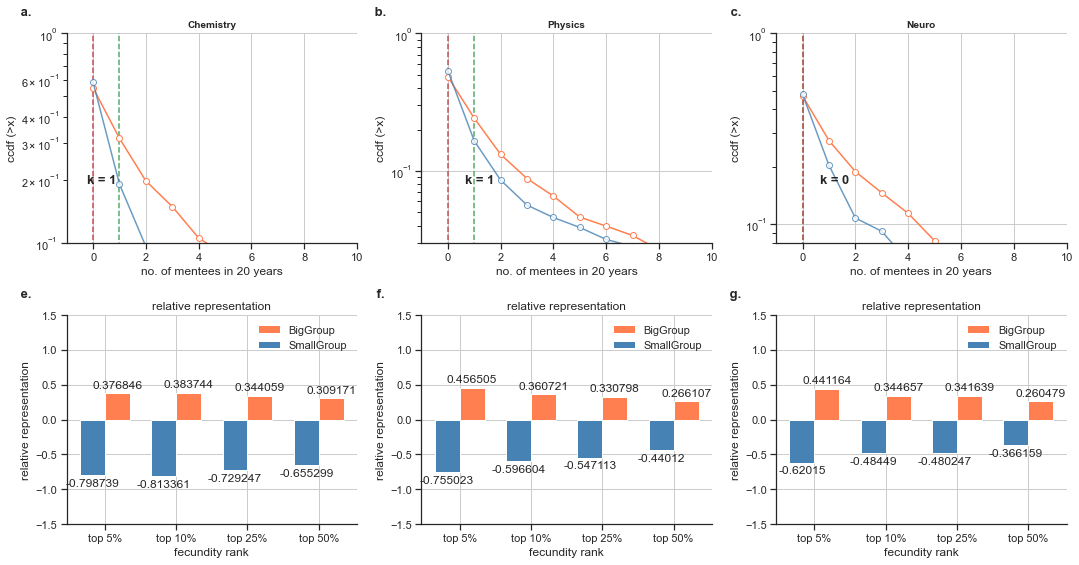

In [6]:
font = { 'weight': 'bold',
         'size': 10,
         }
font1 = { 'weight': 'bold',
         'size': 13,
         }
sns.set(style='ticks', font_scale=1, font='Arial')
group_success = 'YearlyCitationOfMentor'
y_success = 'YearlyCitationOfMentee'
start = 1960
end = start + 10
#选取不同层次的人比较 (choose comparing targets in different level)
percent = 0
percent1 = 1

# # 60-70  
# #大小团队分组标准 (big groups and small groups)
pt = 0.25
pt1 = 0.30

# 70-80  
#大小团队分组标准 (big groups and small groups)
# pt = 0.25
# pt1 = 0.30


# # 80-90  
# #大小团队分组标准 (big groups and small groups)
# pt = 0.25
# pt1 = 0.35

# # 90-95  
# #大小团队分组标准 (big groups and small groups)
# pt = 0.25
# pt1 = 0.3


l_index = [' a. ',' b. ',' c. ',' d. ',' e. ',' f. ',' g. ',' h. ',' i. ',' j. ',' k. ',' l. ']
Titles = ['Chemistry','Physics','Neuro','Math']
fig = plt.figure(figsize=(20,8),tight_layout=1)#figsize=(10,3.5) ,tight_layout=1
for ii in range(len(files_csv)):
    k = files_csv[ii]
    neuro = pd.read_csv(k)
    
    
    neuro_19602000 = neuro[(neuro['StopYear']>=start)&(neuro['StopYear']<=end)]
    #计算整体的精英分层 y_success (elite layer)
    All_mentee_level = np.array(neuro_19602000[y_success][neuro_19602000['Survival0']==1])
#     All_mentee_level = All_mentee_level[All_mentee_level>0]
    
    
#     print(neuro_19602000.head(3))
    #根据当时时代的基数重新划分bigorsmall (big groups and small groups)
    mentees_groupsize = np.array(neuro_19602000[['MenteeID','NumOfMenteesOfTheMentor10']])
    mm = sorted(mentees_groupsize,key = lambda x:x[1],reverse=1)
    
    big = mm[:round(len(mm)*pt)]
    bigGroup = list(set([tt[0] for tt in big]))
    small = mm[-round(len(mm)*pt1):]
    smallGroup = list(set([tt[0] for tt in small]))
    
    #再根据老师学生给老师分组  (group mentors)
    mentors_mtenum = np.array(neuro_19602000[['MentorID',group_success]])   #group_success
    mm = sorted(mentors_mtenum,key = lambda x:x[1],reverse=1)
#     print('mm:',mm)


#     #选取不同层次的人比较
#     percent = 0.75
#     percent1 = 1
    
    
    
    top = mm[round(len(mm)*percent):round(len(mm)*percent1)]
    top = list(set([tt[0] for tt in top]))
    neuro_19602000 = neuro_19602000[neuro_19602000['MentorID'].isin(top)]
#     print(neuro_19602000.shape)
    n_bigGroup = neuro_19602000['NumOfMenteesOfTheMenteeIn20'][neuro_19602000.MenteeID.isin(bigGroup)]
    n_smallGroup = neuro_19602000['NumOfMenteesOfTheMenteeIn20'][neuro_19602000.MenteeID.isin(smallGroup)]
    
#     n_bigGroup = neuro_19602000['NumOfMenteesOfTheMenteeIn20'][neuro_19602000.BigOrSmall==1]
#     n_smallGroup = neuro_19602000['NumOfMenteesOfTheMenteeIn20'][neuro_19602000.BigOrSmall==0]
    print('大组中的总学生数：',len(n_bigGroup))
    print('小组中的总学生数：',len(n_smallGroup))
#     n_bigGroup1 = n_bigGroup[n_bigGroup>0]
#     n_smallGroup1 = n_smallGroup[n_smallGroup>0]
    n_bigGroup1 = neuro_19602000[y_success][(neuro_19602000.MenteeID.isin(bigGroup))
                                                               &(neuro_19602000.Survival0==1)]
    n_smallGroup1 = neuro_19602000[y_success][(neuro_19602000.MenteeID.isin(bigGroup))
                                                               &(neuro_19602000.Survival0==0)]
    
    
    # ccdf overall & survival(inset) distribution
    ax = fig.add_subplot(2,4,ii+1) 
    ax.text(-0.14, 1.1,l_index[ii], fontdict=font1,ha='center', va='center', transform=ax.transAxes)
    
    X0,Y2,x0,y2 = ccdf_xy(n_bigGroup,n_smallGroup)  # ccdf of overall mentee
#     print(Y2)
    #画广义生存率的阈值 (the crossover point)
    th = []
    for tt in range(100):
        try:
            tp0 = Y2[tt]
            tp1 = y2[tt]
            tp = tp0-tp1
            if tp>-0.01:
                th.append(tt)
        except:
            th = th
    try:
        thre = th[0]
        ax.plot([thre,thre],[min(y2),1],ls='--',c='g')
            #标记 (mark)
        if ii>0:
            ax.text(0.2, 0.3,'k = '+str(thre), fontdict=font1,ha='center', va='center', transform=ax.transAxes)
        else:
             ax.text(0.12, 0.3,'k = '+str(thre), fontdict=font1,ha='center', va='center', transform=ax.transAxes)
    except:
        a = 'nt'
    
    #画生存率比较 (survival rate)
    ax.plot([0,0],[min(y2),1],ls='--',c='r')
    
    
    
#     ax.semilogy(X0,Y2,label='BigGroup',color='coral',marker='o',ls='',markerfacecolor='white') 
#     ax.semilogy(x0,y2,label='SmallGroup',color='steelblue',marker='o',ls='',markerfacecolor='white',alpha=0.8)
#     if ii != 1:
#         ax.loglog(X0,Y2,label='BigGroup',color='coral',marker='o',ls='',markerfacecolor='white') 
#         ax.loglog(x0,y2,label='SmallGroup',color='steelblue',marker='o',ls='',markerfacecolor='white',alpha=0.8)
#     else:
    ax.semilogy(X0,Y2,label='BigGroup',color='coral',marker='o',ls='-',markerfacecolor='white') 
    ax.semilogy(x0,y2,label='SmallGroup',color='steelblue',marker='o',ls='-',markerfacecolor='white',alpha=0.8)
    ax.set_xlabel('no. of mentees in 20 years')
    ax.set_ylabel('ccdf (>x)')
    
    if ii==1:
        ax.set_ylim([0.03,1])
    elif ii==0:
        ax.set_ylim([0.1,1])
    else:
        ax.set_ylim([0.08,1])
    ax.set_xlim([-1,10])
#     ax.set_title('Overall mentee')
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
#     legend = ax.legend(loc='lower left')
#     frame = legend.get_frame() 
#     frame.set_alpha(1) 
#     frame.set_facecolor('none') # 设置图例legend背景透明
#     legend.get_frame().set_linewidth(0.0)
    ax.grid(True,ls="-")
    ax.set_title(Titles[ii],font)
#     if ii==1:
#         ax.set_xlim([-2,50])
#     print(Y2)
#     print(y2)
    
    
    
# # 要添加的子图
#     if ii+1==1:
#         axins = inset_axes(ax, width=1.5, height=1,bbox_to_anchor=(.145, .63, .6, .5),
#                    bbox_transform=ax.transAxes, loc=3)
#     elif ii+1==2:
#         axins = inset_axes(ax, width=1.5, height=1,bbox_to_anchor=(.145, .63, .6, .5),
#                    bbox_transform=ax.transAxes, loc=3)
#     else:
#         axins = inset_axes(ax, width=1.5, height=1,bbox_to_anchor=(.13, .63, .6, .5),
#                    bbox_transform=ax.transAxes, loc=3)
#     yy = threshold_inset[ii+1]
#     tx=range(4)
#     X_ticks = [1960,1970,1980,1990]
#     axins.plot(tx,yy,marker='o',c='grey')
#     c = axins.set_xticks(ticks=tx,labels=X_ticks,rotation=20)
#     axins.tick_params(labelsize=10)
#     axins.set_ylabel('k')
    
    
    
    
    #2均值比较 (average comparison)
    ax = fig.add_subplot(2,4,ii+5)
    ax.text(-0.14, 1.1,l_index[ii+4], fontdict=font1,ha='center', va='center', transform=ax.transAxes)
     
    TP = sorted(All_mentee_level,reverse=1)
    perctil = [0.05,0.1,0.25,0.5]
    data0 = n_bigGroup1
    data1 = n_smallGroup1
    BR = len(data0)/(len(data0)+len(data1))
    SR = len(data1)/(len(data0)+len(data1))
    RP = []
    l = len(TP)
    for pt in perctil:
        temp = TP[:round(l*pt)][-1]   #精英分层的阈值 (threshold)
        b_in = [d0 for d0 in data0 if d0>=temp]   #大团队中学生在经营层的数量 (elited mentees from big groups)
        s_in = [d0 for d0 in data1 if d0>=temp]   #小团队团队中学生在经营层的数量 (elited mentees from small groups)
        try:
            big_rp = len(b_in)/(len(b_in)+len(s_in))
        except:
            big_rp = 0
        try:
            small_rp = len(s_in)/(len(b_in)+len(s_in))
        except:
            small_rp = 0
        try:
            big_rp_relative = big_rp/BR - 1
        except:
            big_rp_relative = -1
        try:
            small_rp_relative = small_rp/SR - 1
        except:
            small_rp_relative = -1
        
        RP.append((big_rp,small_rp,big_rp_relative,small_rp_relative))
    
    y_b = [j[2] for j in RP]
    y_s = [j[3] for j in RP]
    X_ticks = ['top 5%','top 10%','top 25%','top 50%']
    width = 0.35
    x = np.array(range(4))
    
    rects1 = ax.bar(x+width/2,y_b,width,label='BigGroup',color='coral')
    rects2 = ax.bar(x-width/2,y_s,width,label='SmallGroup',color='steelblue')
    ax.bar_label(rects1, padding=3)
    ax.bar_label(rects2, padding=3)
#     ax.legend()
    ax.set_ylabel('relative representation')
    ax.set_xlabel('fecundity rank')
    c = ax.set_xticks(ticks=x,labels=X_ticks)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.set_ylim([-1.5,1.5])
    legend = ax.legend(loc='upper right')
    frame = legend.get_frame() 
    frame.set_alpha(1) 
    frame.set_facecolor('none') 
    legend.get_frame().set_linewidth(0.0)
    ax.grid(True,which='both',ls="-")
    ax.set_title('Survival mentee')
    ax.set_title('relative representation')
    
# fig.savefig('./fig2_3/' + str(percent) +'_'+ str(percent1) + '_' + 'fig2_3_' + str(start) + str(end) + '.pdf')

#### 总图 (overall plot)

In [7]:
threshold_inset = {1:[1,1,2,4],2:[1,2,3,4],3:[1,1,2,4]}

In [8]:
T = np.array([[0.26, 0.09, 0.11, -0.06],[0.17, 0.12, 0.16, 0.06],[-0.0, -0.02, 0.06, 0.05],
     [0.13, 0.21, 0.23, 0.05]])
T = T.T

for i in T:
    tp = ''
    for j in i:
         tp = tp+str(j)+','
    print(tp)

0.26,0.17,-0.0,0.13,
0.09,0.12,-0.02,0.21,
0.11,0.16,0.06,0.23,
-0.06,0.06,0.05,0.05,


In [9]:
representation_evolution = {0:{'small':{'top 5%':[-0.27,-0.25,-0.16,-0.09],
                                        'top 10%':[-0.2, -0.22,-0.19,-0.11],
                                       'top 25%':[-0.07, -0.13, -0.14 ,-0.07],
                                        'top 50%':[-0.04 ,-0.1  ,-0.06, -0.04]},
                               'big':{'top 5%':[0.35 ,0.35, 0.25, 0.16],
                                      'top 10%':[0.26, 0.31, 0.29, 0.20],
                                     'top 25%':[0.09, 0.18 ,0.21, 0.13],
                                      'top 50%':[0.06, 0.13, 0.09 ,0.08]}
                              },
                            
                            1:{'small':{'top 5%':[-0.22,-0.24,-0.14,-0.08],
                                        'top 10%':[-0.23,-0.32,-0.10,-0.15],
                                       'top 25%':[-0.13,-0.15,-0.08,-0.13],
                                        'top 50%':[-0.09,-0.1,-0.07,-0.08]},
                               'big':{'top 5%':[0.38,0.45,0.24,0.19],
                                      'top 10%':[0.4,0.6,0.18,0.34],
                                     'top 25%':[0.23,0.28,0.13,0.29],
                                      'top 50%':[0.15,0.19,0.12,0.18]}
                              },
                            
                           2:{'small':{'top 5%':[-0.17,-0.12,0.0,-0.07],
                                       'top 10%':[-0.06,-0.09,0.01,-0.11],
                                       'top 25%':[-0.07,-0.12,-0.03,-0.12],
                                       'top 50%':[0.04,-0.04,-0.03,-0.03]},
                              
                               'big':{'top 5%':[0.26,0.17,-0.0,0.13],
                                      'top 10%':[0.09,0.12,-0.02,0.21],
                                     'top 25%':[0.11,0.16,0.06,0.23],
                                      'top 50%':[-0.06,0.06,0.05,0.05]}
                             }
                           }               

大组中的总学生数： 1414
小组中的总学生数： 1665
4
0
大组中的总学生数： 1414
小组中的总学生数： 1665
大组中的总学生数： 1116
小组中的总学生数： 690
4
1
大组中的总学生数： 565
小组中的总学生数： 690
大组中的总学生数： 1834
小组中的总学生数： 931
4
2
大组中的总学生数： 928
小组中的总学生数： 1124


<ipython-input-70-7dc9e9581924>:415: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.savefig('./fig2_3/' + str(percent) +'_'+ str(percent1) + '_' + 'fig2_3_' + str(start) + str(end) + '.pdf')
/Users/yanmemgxing/anaconda3/lib/python3.8/site-packages/IPython/core/pylabtools.py:132: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.print_figure(bytes_io, **kw)


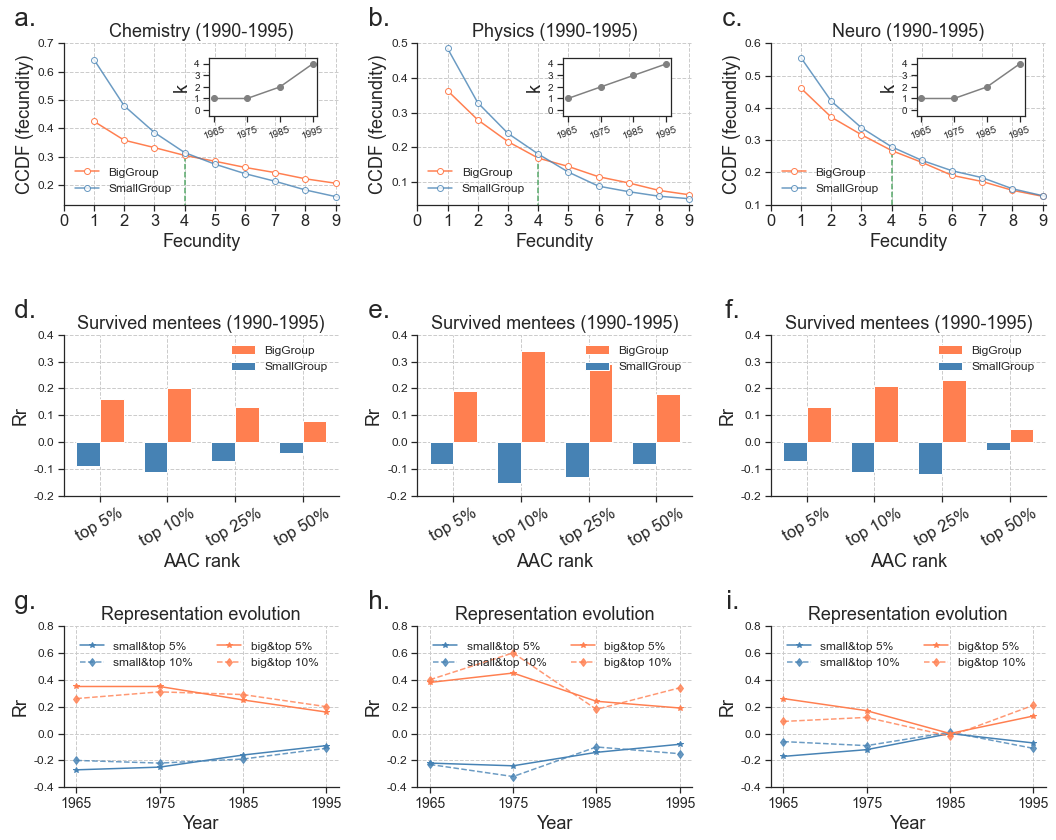

In [70]:
# font = { 'weight': 'bold',
#          'size': 10,
#          }
# font1 = { 'weight': 'bold',
#          'size': 13,
#          }
sns.set(style='ticks', font_scale=1.5, font='Arial')
group_success = 'YearlyCitationOfMentor'
y_success = 'YearlyCitationOfMentee'
start = 1990
end = start + 5
#选取不同层次的人比较 (different level)
percent = 0
percent1 = 1
    
#大小团队分组标准 (big group and small group)
pt = 0.25
pt1 = 0.3


l_index = [' a. ',' b. ',' c. ',' d. ',' e. ',' f. ',' g. ',' h. ',' i. ']
Titles = ['Chemistry (1990-1995)','Physics (1990-1995)','Neuro (1990-1995)']
fig = plt.figure(figsize=(15,12),tight_layout=1)#figsize=(10,3.5) ,tight_layout=1

for ii in range(len(files_csv)):
    k = files_csv[ii]
    neuro = pd.read_csv(k)
    
    
    neuro_19602000 = neuro[(neuro['StopYear']>=start)&(neuro['StopYear']<=end)]
    #计算整体的精英分层  (elite layer) y_success
    All_mentee_level = np.array(neuro_19602000[y_success][neuro_19602000['Survival0']==1])
#     All_mentee_level = All_mentee_level[All_mentee_level>0]
    
    
#     print(neuro_19602000.head(3))
    #根据当时时代的基数重新划分 (regroup small group and big group)
    mentees_groupsize = np.array(neuro_19602000[['MenteeID','NumOfMenteesOfTheMentor10']])
    mm = sorted(mentees_groupsize,key = lambda x:x[1],reverse=1)
    
    big = mm[:round(len(mm)*pt)]
    bigGroup = list(set([tt[0] for tt in big]))
    if ii==2:
        pt1=0.25
    small = mm[-round(len(mm)*pt1):]
    smallGroup = list(set([tt[0] for tt in small]))
    
    #再根据老师学生给老师分组 (group mentors)
    mentors_mtenum = np.array(neuro_19602000[['MentorID',group_success]])   #group_success
    mm = sorted(mentors_mtenum,key = lambda x:x[1],reverse=1)
#     print('mm:',mm)


    
    
    
    top = mm[round(len(mm)*percent):round(len(mm)*percent1)]
    top = list(set([tt[0] for tt in top]))
    neuro_19602000 = neuro_19602000[neuro_19602000['MentorID'].isin(top)]
#     print(neuro_19602000.shape)
    n_bigGroup = neuro_19602000['NumOfMenteesOfTheMenteeIn20'][neuro_19602000.MenteeID.isin(bigGroup)]
    n_smallGroup = neuro_19602000['NumOfMenteesOfTheMenteeIn20'][neuro_19602000.MenteeID.isin(smallGroup)]
    
#     n_bigGroup = neuro_19602000['NumOfMenteesOfTheMenteeIn20'][neuro_19602000.BigOrSmall==1]
#     n_smallGroup = neuro_19602000['NumOfMenteesOfTheMenteeIn20'][neuro_19602000.BigOrSmall==0]
    print('大组中的总学生数：',len(n_bigGroup))
    print('小组中的总学生数：',len(n_smallGroup))
#     n_bigGroup1 = n_bigGroup[n_bigGroup>0]
#     n_smallGroup1 = n_smallGroup[n_smallGroup>0]
    n_bigGroup1 = neuro_19602000[y_success][(neuro_19602000.MenteeID.isin(bigGroup))
                                                               &(neuro_19602000.Survival0==1)]
    n_smallGroup1 = neuro_19602000[y_success][(neuro_19602000.MenteeID.isin(bigGroup))
                                                               &(neuro_19602000.Survival0==0)]
    
    
    # ccdf overall & survival(inset) distribution
    ax = fig.add_subplot(3,3,ii+1) 
    ax.text(-0.14, 1.15,l_index[ii],ha='center', va='center', transform=ax.transAxes,fontsize=26)
    
    X0,Y2,x0,y2 = ccdf_xy(n_bigGroup,n_smallGroup)  # ccdf of overall mentee
#     print(Y2)
    #画广义生存率的阈值 (threshold of survival rate)
    th = []
    for tt in range(100):
        try:
            tp0 = Y2[tt]
            tp1 = y2[tt]
            tp = tp0-tp1
            if tp>-0.01:
                th.append(tt)
        except:
            th = th
    try:
        thre = th[0]
        print(thre)
        
            #标记 (mark)
        if ii==0:
            
            ax.plot([thre,thre],[min(y2),0.3],ls='--',c='g')
#             ax.text(0.3, 0.3,'k = '+str(thre), ha='center', va='center', transform=ax.transAxes)
            print(ii)
        elif ii==1:
            ax.plot([thre,thre],[min(y2),0.16],ls='--',c='g')
#             ax.text(0.25, 0.3,'k = '+str(thre), ha='center', va='center', transform=ax.transAxes)
            print(ii)
        else:
            ax.plot([thre,thre],[min(y2),0.26],ls='--',c='g')
#             ax.text(0.38, 0.3,'k = '+str(thre), ha='center', va='center', transform=ax.transAxes)
            print(ii)
    except:
        a = 'nt'
    
    X0 = X0+1
    x0 = x0+1
#     ax.semilogy(X0,Y2,label='BigGroup',color='coral',marker='o',ls='-',markerfacecolor='white') 
#     ax.semilogy(x0,y2,label='SmallGroup',color='steelblue',marker='o',ls='-',markerfacecolor='white',alpha=0.8)
    ax.plot(X0,Y2,label='BigGroup',color='coral',marker='o',ls='-',markerfacecolor='white') 
    ax.plot(x0,y2,label='SmallGroup',color='steelblue',marker='o',ls='-',markerfacecolor='white',alpha=0.8)
    ax.set_xlabel('Fecundity')
    ax.set_ylabel('CCDF (fecundity)')
    legend = ax.legend(loc='lower left',fontsize=12)
    ax.xaxis.set_major_locator(MultipleLocator(1.0))  
    
    Y_ticks = [0.1,0.2,0.3,0.4,0.5,0.6,0.7]
    ty = [0.1,0.2,0.3,0.4,0.5,0.6,0.7]
    c = ax.set_yticks(ticks=ty,labels=Y_ticks,fontsize=12)
    
    frame = legend.get_frame() 
    frame.set_alpha(1) 
    frame.set_facecolor('none')
    legend.get_frame().set_linewidth(0.0)
    
    if ii==0:
        ax.set_ylim([0.13,0.7])
        ax.set_xlim([0,9.1])
        
    elif ii==1:
        ax.set_ylim([0.035,0.5])
        ax.set_xlim([0,9.1])
    else:
        ax.set_ylim([0.10,0.6])
        ax.set_xlim([0,9.1])
#     ax.set_title('Oveall mentee')
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
#     legend = ax.legend(loc='lower left')
#     frame = legend.get_frame() 
#     frame.set_alpha(1) 
#     frame.set_facecolor('none') #
#     legend.get_frame().set_linewidth(0.0)
    ax.grid(True,ls="--",which='both')
    ax.set_title(Titles[ii])
#     if ii==1:
#         ax.set_xlim([-2,50])
#     print(Y2)
#     print(y2)
        
# 要添加的子图 (plot subplots)
    if ii+1==1:
        axins = inset_axes(ax, width=1.5, height=0.8,bbox_to_anchor=(.5, .5, .6, .5),
                   bbox_transform=ax.transAxes, loc=3)
    elif ii+1==2:
        axins = inset_axes(ax, width=1.5, height=0.8,bbox_to_anchor=(.5, .5, .6, .5),
                   bbox_transform=ax.transAxes, loc=3)
    else:
        axins = inset_axes(ax, width=1.5, height=0.8,bbox_to_anchor=(.5, .5, .6, .5),
                   bbox_transform=ax.transAxes, loc=3)
    yy = threshold_inset[ii+1]
    tx=range(4)
    X_ticks = [1965,1975,1985,1995]
    axins.plot(tx,yy,marker='o',c='grey')
    c = axins.set_xticks(ticks=tx,labels=X_ticks,rotation=20)
    axins.tick_params(labelsize=10)
    axins.set_ylabel('k')
    axins.set_ylim([-0.5,4.5])
    axins.yaxis.set_major_locator(MultipleLocator(1.0)) 
    
    
#第二行的图    (the second row)
    
    pt = 0.25
    pt1 = 0.3
    neuro_19602000 = neuro[(neuro['StopYear']>=1990)&(neuro['StopYear']<=1995)]
    #计算整体的精英分层 (elite layer) y_success
    All_mentee_level = np.array(neuro_19602000[y_success][neuro_19602000['Survival0']==1])
#     All_mentee_level = All_mentee_level[All_mentee_level>0]
    
    
#     print(neuro_19602000.head(3))
    #根据当时时代的基数重新划分 (group denpending on epoch)
    mentees_groupsize = np.array(neuro_19602000[['MenteeID','NumOfMenteesOfTheMentor10']])
    mm = sorted(mentees_groupsize,key = lambda x:x[1],reverse=1)
    
    big = mm[:round(len(mm)*pt)]
    bigGroup = list(set([tt[0] for tt in big]))
    small = mm[-round(len(mm)*pt1):]
    smallGroup = list(set([tt[0] for tt in small]))
    
    #再根据老师学生给老师分组 (regroup mentors)
    mentors_mtenum = np.array(neuro_19602000[['MentorID',group_success]])   #group_success
    mm = sorted(mentors_mtenum,key = lambda x:x[1],reverse=1)
#     print('mm:',mm)


#     #选取不同层次的人比较
#     percent = 0.75
#     percent1 = 1
    
    
    
    top = mm[round(len(mm)*percent):round(len(mm)*percent1)]
    top = list(set([tt[0] for tt in top]))
    neuro_19602000 = neuro_19602000[neuro_19602000['MentorID'].isin(top)]
#     print(neuro_19602000.shape)
    n_bigGroup = neuro_19602000['NumOfMenteesOfTheMenteeIn20'][neuro_19602000.MenteeID.isin(bigGroup)]
    n_smallGroup = neuro_19602000['NumOfMenteesOfTheMenteeIn20'][neuro_19602000.MenteeID.isin(smallGroup)]
    
#     n_bigGroup = neuro_19602000['NumOfMenteesOfTheMenteeIn20'][neuro_19602000.BigOrSmall==1]
#     n_smallGroup = neuro_19602000['NumOfMenteesOfTheMenteeIn20'][neuro_19602000.BigOrSmall==0]
    print('大组中的总学生数：',len(n_bigGroup))
    print('小组中的总学生数：',len(n_smallGroup))
#     n_bigGroup1 = n_bigGroup[n_bigGroup>0]
#     n_smallGroup1 = n_smallGroup[n_smallGroup>0]
    n_bigGroup1 = neuro_19602000[y_success][(neuro_19602000.MenteeID.isin(bigGroup))
                                                               &(neuro_19602000.Survival0==1)]
    n_smallGroup1 = neuro_19602000[y_success][(neuro_19602000.MenteeID.isin(smallGroup))
                                                               &(neuro_19602000.Survival0==1)]
    
    
    #2均值比较 (average comparison)
    ax = fig.add_subplot(3,3,ii+4)
    ax.text(-0.14, 1.15,l_index[ii+3],ha='center', va='center', transform=ax.transAxes,fontsize=26)
     
    TP = sorted(All_mentee_level,reverse=1)
    perctil = [0.05,0.1,0.25,0.5]
    data0 = n_bigGroup1
    data1 = n_smallGroup1
    BR = len(data0)/(len(data0)+len(data1))
    SR = len(data1)/(len(data0)+len(data1))
    RP = []
    l = len(TP)
    for pt in perctil:
        temp = TP[:round(l*pt)][-1]   #精英分层的阈值 (threshold of elites)
        b_in = [d0 for d0 in data0 if d0>=temp]   #大团队中学生在经营层的数量 (elited mentees from big groups)
        s_in = [d0 for d0 in data1 if d0>=temp]   #小团队团队中学生在经营层的数量 (elited mentees from small groups)
        try:
            big_rp = len(b_in)/(len(b_in)+len(s_in))
        except:
            big_rp = 0
        try:
            small_rp = len(s_in)/(len(b_in)+len(s_in))
        except:
            small_rp = 0
        try:
            big_rp_relative = big_rp/BR - 1
        except:
            big_rp_relative = -1
        try:
            small_rp_relative = small_rp/SR - 1
        except:
            small_rp_relative = -1
        
        RP.append((big_rp,small_rp,big_rp_relative,small_rp_relative))
    
    y_b = [round(j[2],2) for j in RP]
    y_s = [round(j[3],2) for j in RP]
    X_ticks = ['top 5%','top 10%','top 25%','top 50%']
    width = 0.35
    x = np.array(range(4))
    
    rects1 = ax.bar(x+width/2,y_b,width,label='BigGroup',color='coral')
    rects2 = ax.bar(x-width/2,y_s,width,label='SmallGroup',color='steelblue')
#     ax.bar_label(rects1, label_type='center')
#     ax.bar_label(rects2, label_type='center')
#     ax.legend()
    ax.set_ylabel('Rr')
    ax.set_xlabel('AAC rank')
    c = ax.set_xticks(ticks=x,labels=X_ticks,rotation=30)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.set_ylim([-0.2,0.4])
    Y_ticks = [-0.2,-0.1,0.0,0.1,0.2,0.3,0.4]
    ty = [-0.2,-0.1,0.0,0.1,0.2,0.3,0.4]
    c = ax.set_yticks(ticks=ty,labels=Y_ticks,fontsize=12)
    legend = ax.legend(loc='upper right',fontsize=12)
    frame = legend.get_frame() 
    frame.set_alpha(1) 
    frame.set_facecolor('none') 
    legend.get_frame().set_linewidth(0.0)
    ax.grid(True,which='both',ls="--")
    if ii==0:
        ax.set_title('Survived mentees (1990-1995)')
    elif ii==1:
        ax.set_title('Survived mentees (1990-1995)')
    else:
        ax.set_title('Survived mentees (1990-1995)')
#     ax.set_title('relative representation')


#第三行代表性演化图 (the third row: representation evolution)
    ax = fig.add_subplot(3,3,ii+7)
    ax.text(-0.14, 1.15,l_index[ii+6],ha='center', va='center', transform=ax.transAxes,fontsize=26)
    ax.grid(True,which='both',ls="--")
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    temp = representation_evolution[ii]
    c_dict = {'small':'steelblue','big':'coral'}
    alpha_dict = {'top 5%':1,'top 10%':0.8,'top 25%':0.6,'top 50%':0.5}
    mk_dict = {'top 5%':'*','top 10%':'d','top 25%':'^','top 50%':'+'}
    for tt in ['small','big']:
        for tz in ['top 5%','top 10%']:  #,'top 10%','top 25%','top 50%'
            tp = temp[tt][tz]
            tx=range(4)
            X_ticks = [1965,1975,1985,1995]
            if tz=='top 5%':
                ax.plot(tx,tp,c=c_dict[tt],alpha=alpha_dict[tz],label=tt+'&'+tz,marker=mk_dict[tz])
            else:
                ax.plot(tx,tp,c=c_dict[tt],alpha=alpha_dict[tz],label=tt+'&'+tz,marker=mk_dict[tz],ls='--')
    c = ax.set_xticks(ticks=tx,labels=X_ticks,rotation=0)
    if ii!=3:
#         legend = ax.legend(loc='lower right',ncol=2,fontsize=12)
        legend = ax.legend(loc=(-0.15,-0.15), bbox_to_anchor=(0.13, 0.8, 6/10, 3/5),
                              borderaxespad=0,edgecolor='white',ncol=2,fontsize=12)
        frame = legend.get_frame() 
        frame.set_alpha(1) 
        frame.set_facecolor('none') 
        legend.get_frame().set_linewidth(0.0)
    ax.tick_params(labelsize=14)
    ax.set_ylabel('Rr')
    ax.set_xlabel('Year')
    ax.set_ylim([-0.4,0.8])
    Y_ticks = [-0.4,-0.2,0.0,0.2,0.4,0.6,0.8]
    ty = [-0.4,-0.2,0.0,0.2,0.4,0.6,0.8]
    c = ax.set_yticks(ticks=ty,labels=Y_ticks,fontsize=12)
    ax.set_title('Representation evolution')
fig.savefig('./fig2_3/' + str(percent) +'_'+ str(percent1) + '_' + 'fig2_3_' + str(start) + str(end) + '.pdf')
    

In [11]:
def ccdf_xy(data0,data1):
    TP0 = dict(Counter(data0))
#     print(TP0)
    TP1 = sorted(TP0.items(),key = lambda i:i[0],reverse=0)
#     print(TP1)
    
        #SmallGroup
    tp0 = dict(Counter(data1))
#     print(tp0)
    tp1 = sorted(tp0.items(),key = lambda i:i[0],reverse=0)
#     print(tp1)
    
    X0 = np.array([k[0] for k in TP1])
    Y0 = np.array([k[1] for k in TP1])
    Y1 = []
    temp = 0
    for k in Y0:
        temp+=k
        Y1.append(temp)
    Y1 = np.array(Y1)
    Y0 = Y0/len(data0)
    Y1 = Y1/len(data0)
    Y2 = 1-Y1
    
    x0 = np.array([k[0] for k in tp1])
    y0 = np.array([k[1] for k in tp1])
    y1 = []
    temp = 0
    for k in y0:
        temp+=k
        y1.append(temp)
    y1 = np.array(y1)
    
    y0 = y0/len(data1)
    y1 = y1/len(data1)
    y2 = 1-y1
    
    return X0,Y2,x0,y2